## Debbie Pao

### Lab 5

1. Will the AND-1 riboswitch cleave itself when both of its OBS are bound?   
If both of its OBS are bound, then AND-1 will return true so it will cleave itself.   
2. Will the OR-1 riboswitch cleave itself when neither of its OBS are bound?  
Since none of the OBS are bound, it will be false so it will not cleave itself.  
3. What behavior do we expect from the YES-1 riboswitch?  
The YES-1 riboswitch remains inactive until it receives a impulse that triggers activity.

In [1]:
#Please copy down the sequences for the YES-1 riboswitch fromFigure 2a, 
#theNOT-1 riboswitch in Figure 4a, the AND-1riboswitch in Figure 5a, and the OR-1 riboswitch in Figure 6a.

yes1 = 'GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC'
not1 = 'GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUUGCGUCCUGUAUUCCACUGC'
and1 = 'GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU'
or1 = 'GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC'

For each riboswitch, produce a table in your iPython notebook that contains the following information: (1) riboswitch name, (2) start and end coordinates of OBS-1 (blue region), (3) start and end coordinates of OBS-2 (blue region, only applicable to AND-1 and OR-1), and (4) start and end coordinates of the two red regions.


1. Riboswitch name: YES-1  
OBS-1: 26-47  
Red regions: 16-21 and 49-54  
2. Riboswitch name: NOT-1  
OBS-1: 44-66  
Red regions: 40-43 and 74-77  
3. Riboswitch name: AND-1
OBS-1: 30-45  
OBS-2: 49-64  
Red regions: 16-23 and 70-77  
4. Riboswitch name: OR-1  
OBS-1: 26-47    
OBS-2: 47-66  
Red regions: 16-26 and 67-77







In [15]:
import subprocess

seqs = \
""">seq1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
>seq2
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUUGCGUCCUGUAUUCCACUGC
>seq3
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
>seq4
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
>@"""

p = subprocess.run(["RNAFold"], 
                   input = bytes(seqs, 'ascii'), 
                   stdout=subprocess.PIPE, 
                   stderr=subprocess.PIPE)

print("Terminal Output:")
print(p.stderr.decode())

print("Output File")
print(p.stdout.decode())

Terminal Output:

Output File
>seq1
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))) (-33.00)
>seq2
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..))))..)))))).))))))....)))) (-26.30)
>seq3
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).))))))))......... (-42.10)
>seq4
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((.....(((.(((.......))).))).)))...)).))))))).))))).....(((((....))))).)))))))) (-40.00)



Since after we run RNAFold, we obtain .ps files, in order to show it here we have to convert to an image file. I used GhostScript to convert the .ps files to .png files by running this command in terminal: "gs -o yes1.png -sDEVICE=png16m /Users/DebbiePao/seq1_ss.ps" 

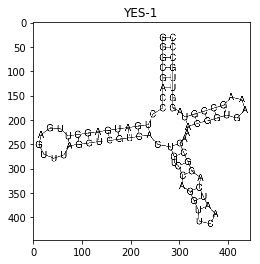

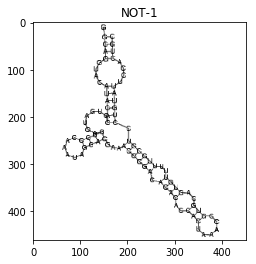

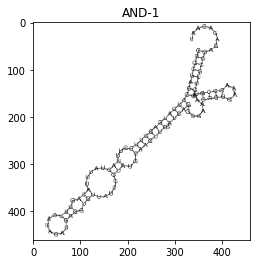

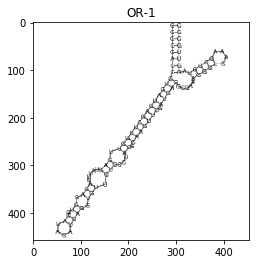

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image1 = mpimg.imread('yes1.png')
plt.title('YES-1')
plt.imshow(image1)
plt.show()

image2 = mpimg.imread('not1.png')
plt.title('NOT-1')
plt.imshow(image2)
plt.show()

image3 = mpimg.imread('and1.png')
plt.title('AND-1')
plt.imshow(image3)
plt.show()

image4 = mpimg.imread('or1.png')
plt.title('OR-1')
plt.imshow(image4)
plt.show()

Comparing what I generated here to the figures in the publication, I see that YES-1 has differences. In the paper, YES-1 only has 3 branches but here we see tha YES-1 has 4 branches. For NOT-1 there is another loop/circle formed where nucleotides aren't bound.

In [33]:
# Generate yes1Constraint.txt by adding an x in the OBS-1 one sections that we found in part 1
file = open('yes1Constraint.txt', 'r')
data = file.read()
p = subprocess.run(['RNAFold', '-C'], 
                   input = bytes(data, 'ascii'), 
                   stdout=subprocess.PIPE, 
                   stderr=subprocess.PIPE)
print("YES-1")
print(p.stderr.decode())
print(p.stdout.decode())

YES-1

GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......((((((...........................))))))...(((((....))))).)))))))) (-24.50)



In [34]:
file = open('not1Constraint.txt', 'r')
data = file.read()
p = subprocess.run(['RNAFold', '-C'], 
                   input = bytes(data, 'ascii'), 
                   stdout=subprocess.PIPE, 
                   stderr=subprocess.PIPE)
print(p.stderr.decode())
print(p.stdout.decode())


GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((..((((.((((......))))(((((((.......................)))))))..))))))))))....)))) (-20.60)



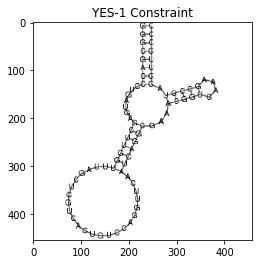

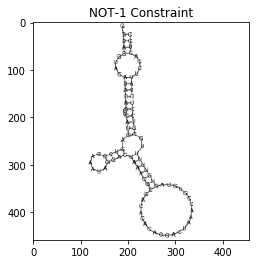

In [36]:
image5 = mpimg.imread('yes1Constraint.png')
plt.title('YES-1 Constraint')
plt.imshow(image5)
plt.show()

image6 = mpimg.imread('not1Constraint.png')
plt.title('NOT-1 Constraint')
plt.imshow(image6)
plt.show()

Here, we see that for the YES-1 constraint, it looks the same as the self-cleaving form of YES-1 in figure 2. The red regions are bound to each other. For the NOT-1 constraint, the red regions are not bound with each other anymore. The NOT-1 constraint image here also looks the same as the self-cleaving form of NOT-1 in figure 4. In figure 4, the red regions of the self-cleaving form also are not bound anymore.

Truth Table for AND:  
Input (bound/unbound) | Output  
True, True | True  
True, False | False  
False, True | False  
False, False | False  


In [37]:
file = open('and1TF.txt', 'r')
data = file.read()
p = subprocess.run(['RNAFold', '-C'], 
                   input = bytes(data, 'ascii'), 
                   stdout=subprocess.PIPE, 
                   stderr=subprocess.PIPE)
print(p.stderr.decode())
print(p.stdout.decode())


GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((..........................(((.(....))))...))))))).))))).....(((((....))))).))))))))......... (-33.90)



In [38]:
file = open('and1FT.txt', 'r')
data = file.read()
p = subprocess.run(['RNAFold', '-C'], 
                   input = bytes(data, 'ascii'), 
                   stdout=subprocess.PIPE, 
                   stderr=subprocess.PIPE)
print(p.stderr.decode())
print(p.stdout.decode())


GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
(((((((((((((((((((((...(((.......))))))........................))))).))))).....(((((....))))).))))))))......... (-29.60)



In [39]:
file = open('and1TT.txt', 'r')
data = file.read()
p = subprocess.run(['RNAFold', '-C'], 
                   input = bytes(data, 'ascii'), 
                   stdout=subprocess.PIPE, 
                   stderr=subprocess.PIPE)
print(p.stderr.decode())
print(p.stdout.decode())


GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((..............................................))))).))))).....(((((....))))).))))))))......... (-27.64)



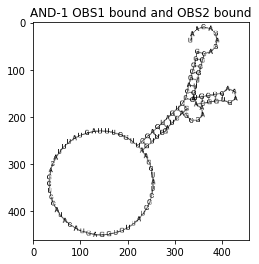

In [40]:
image7 = mpimg.imread('and1tt.png')
plt.title('AND-1 OBS1 bound and OBS2 bound')
plt.imshow(image7)
plt.show()

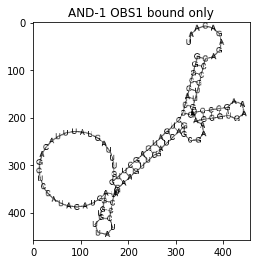

In [49]:
image8 = mpimg.imread('and1tf.png')
plt.title('AND-1 OBS1 bound only')
plt.imshow(image8)
plt.show()

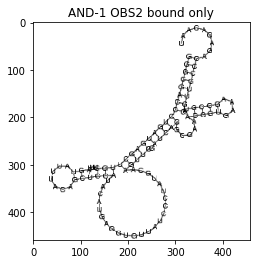

In [42]:
image9 = mpimg.imread('and1ft.png')
plt.title('AND-1 OBS2 bound only')
plt.imshow(image9)
plt.show()

Truth Table for OR:  
Input (bound/unbound) | Output  
True, True | True  
True, False | True  
False, True | True  
False, False | False  

In [43]:
file = open('or1TF.txt', 'r')
data = file.read()
p = subprocess.run(['RNAFold', '-C'], 
                   input = bytes(data, 'ascii'), 
                   stdout=subprocess.PIPE, 
                   stderr=subprocess.PIPE)
print(p.stderr.decode())
print(p.stdout.decode())


GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUGCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((...........................)))...)).))))))).))))).....(((((....))))).)))))))) (-34.20)



In [44]:
file = open('or1FT.txt', 'r')
data = file.read()
p = subprocess.run(['RNAFold', '-C'], 
                   input = bytes(data, 'ascii'), 
                   stdout=subprocess.PIPE, 
                   stderr=subprocess.PIPE)
print(p.stderr.decode())
print(p.stdout.decode())


GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUGCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......(((((((((((........................................)))))))))))...(((((....))))).)))))))) (-29.09)



In [45]:
file = open('or1TT.txt', 'r')
data = file.read()
p = subprocess.run(['RNAFold', '-C'], 
                   input = bytes(data, 'ascii'), 
                   stdout=subprocess.PIPE, 
                   stderr=subprocess.PIPE)
print(p.stderr.decode())
print(p.stdout.decode())


GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUGCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......(((((((((((........................................)))))))))))...(((((....))))).)))))))) (-29.09)



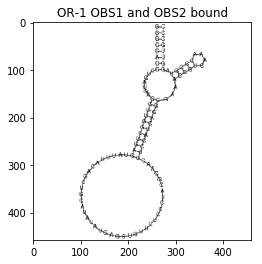

In [46]:
image10 = mpimg.imread('or1TT.png')
plt.title('OR-1 OBS1 and OBS2 bound')
plt.imshow(image10)
plt.show()

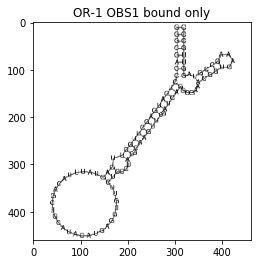

In [47]:
image11 = mpimg.imread('or1TF.png')
plt.title('OR-1 OBS1 bound only')
plt.imshow(image11)
plt.show()

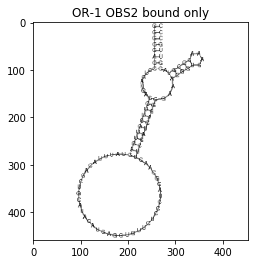

In [48]:
image12 = mpimg.imread('or1FT.png')
plt.title('OR-1 OBS2 bound only')
plt.imshow(image12)
plt.show()

After comparing these generated figures with the AND-1 and OR-1 figures in the paper, all the figures match. Thus, we can conclude that this paper is correct for the figures for AND-1 and OR-1.